#### Note: Latest May 20 (1.30pm) - OneHot Encoding


## Reading in data and taking a quick look at some charts

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Read in csv
df = pd.read_csv("Austin_Animal_Center_Outcomes.csv")

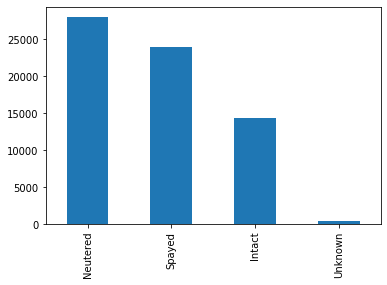

In [3]:
# Take a quick peak at charts

# Top Breeds
# df['Breed'].value_counts().head(20).plot.bar()

# Top Outcome_Types
# df['Breed'].value_counts().head(20).plot.bar()

# Sex split?
# df['Sex'].value_counts().head(20).plot.bar()

# Fixed?
df['Fixed'].value_counts().head(20).plot.bar()

# Age chart
# bins= [0,24,72,120]
# plt.hist(df.Age_month, bins=bins, edgecolor="k")
# plt.xticks(bins)
# plt.show()

In [4]:
df.loc[250:260, :]

,Animal_ID,Name,DateTime,MonthYear,Date_of_Birth,Outcome_Type,Outcome_Subtype,Fixed,Sex,Age_numeric,Age_time,Age_month,Breed,Color
250,A809527,*Cricket,12/11/2019 16:17,12/11/2019 16:17,10/18/2019,Adoption,Foster,Spayed,Female,1,month,1.0,Labrador Retriever Mix,Black/White
251,A797472,NaN,06/13/2019 06:59:00 PM,06/13/2019 06:59:00 PM,04/24/2019,Transfer,Partner,Intact,Female,1,month,1.0,Chihuahua Longhair Mix,Black/Tan
252,A742456,*Arrow,02/14/2017 06:27:00 PM,02/14/2017 06:27:00 PM,12/22/2016,Adoption,Foster,Spayed,Female,1,month,1.0,Pit Bull Mix,Brown/Black
253,A721330,*Glen,3/5/2016 17:40,3/5/2016 17:40,1/9/2016,Adoption,Foster,Neutered,Male,1,month,1.0,German Shepherd Mix,Tan
254,A697339,NaN,02/23/2015 06:36:00 PM,02/23/2015 06:36:00 PM,12/30/2014,Adoption,NaN,Spayed,Female,1,month,1.0,German Shepherd/Pit Bull,Brown
255,A695918,Clementine,01/29/2015 05:59:00 PM,01/29/2015 05:59:00 PM,11/30/2014,Adoption,NaN,Spayed,Female,1,month,1.0,Dachshund/Chihuahua Shorthair,Black/White
256,A809888,NaN,12/4/2019 12:05,12/4/2019 12:05,10/19/2019,Transfer,Partner,Intact,Female,1,month,1.0,Labrador Retriever/German Shepherd,Brown/White
257,A774855,NaN,7/10/2018 19:10,7/10/2018 19:10,05/21/2018,Transfer,Partner,Intact,Male,1,month,1.0,Australian Kelpie Mix,Brown/White
258,A750857,*Cinder,07/28/2017 10:37:00 PM,07/28/2017 10:37:00 PM,6/1/2017,Adoption,Foster,Spayed,Female,1,month,1.0,Great Pyrenees/American Bulldog,Black/White
259,A762939,NaN,11/30/2017 12:00:00 AM,11/30/2017 12:00:00 AM,09/30/2017,Transfer,Partner,Intact,Female,1,month,1.0,Pit Bull Mix,Brown/White


In [5]:
df.shape

(66804, 14)

## Cleaning
1. Drop unnessary columns
2. Drop rows where "Outcome_Type" is null
3. Drop rows where "Outcome_Type" is Return_To_Owner

In [6]:
# Quick check for missing values
df.apply(lambda x: sum(x.isnull()/len(df)))

Animal_ID          0.000000
Name               0.169496
DateTime           0.000000
MonthYear          0.000000
Date_of_Birth      0.000000
Outcome_Type       0.000000
Outcome_Subtype    0.688567
Fixed              0.000015
Sex                0.005673
Age_numeric        0.000000
Age_time           0.000000
Age_month          0.000000
Breed              0.000000
Color              0.000000
dtype: float64

In [12]:
# Drop unnessary columns
df2 = df.drop(columns=['Animal_ID', 'Name', 'DateTime', 'MonthYear', 'Date_of_Birth', 'Outcome_Subtype', 
                       'Age_numeric', 'Age_time' , 'Fixed'])

In [13]:
df2.shape
# df2.head()

(66804, 5)

In [15]:
# Drop rows where Outcome_Type is null

df2 = df2.loc[df2.Outcome_Type.notna(), ["Outcome_Type", "Sex", "Age_month", "Breed" ,"Color"]]

In [16]:
# Check for more nulls
df2.head()
df2.apply(lambda x: sum(x.isnull()/len(df2)))
df2.shape

(66804, 5)

In [17]:
# Have to fix the following columns "Sex"
df2 = df2.dropna(axis=0, subset=["Sex"])

In [18]:
# Verify that nulls from "Fixed" and "Sex" have been dropped
df2.apply(lambda x: sum(x.isnull()/len(df2)))
df2.shape

(66425, 5)

In [20]:
# # df2.groupby('Outcome_Type').count()
# df2.groupby('Color').count().sort_values('Outcome_Type', ascending=False)

In [21]:
# Drop all rows 'Return to Owner' ???  Assuming that chip is checked at intake

df3 = df2.drop(df2[df2.Outcome_Type == "Return to Owner"].index)

In [22]:
# Verify shape
df3.shape

(48025, 5)

In [23]:
# Verify group by counts (Return to Owner should be gone)
df3.groupby('Outcome_Type').count()

,Sex,Age_month,Breed,Color
Outcome_Type,,,,
Adoption,31395,31395,31395,31395
Died,209,209,209,209
Disposal,22,22,22,22
Euthanasia,1694,1694,1694,1694
Missing,29,29,29,29
Rto-Adopt,498,498,498,498
Transfer,14178,14178,14178,14178


In [24]:
# Anymore missing values before we move on?  If zero, then we are good.
df3.apply(lambda x: sum(x.isnull()/len(df3)))

Outcome_Type    0.0
Sex             0.0
Age_month       0.0
Breed           0.0
Color           0.0
dtype: float64

## Add new features?
1. New feature? - Mixed/Pure Breed? - COMPLETED!! 
2. Split breeds - COMPLETED!!
3. Color -  We have 333 unique color combinations. Hot encoding "Color" will create additional X features if we didn't do anything.  This would be unlikely to create a good performing model.
    *  Option 1 - We take any values occurring fewer than 300 times and places them into the “other” label. We use this to create a new feature called “Top_colors”.  Doing this would reduce 333 unique colors to 30 unique values - COMPLETED!
    *  Option 2 - Split to primary color vs secondary color? - COMPLETED!
4. Creating age groups - COMPLETED!!
5. Breeds - Hot encoding "Breed" will create additional 1,380 new features if we didn't do anything.  
6. New feature? - Single color/Multi color?

#### Creating a Mix/Pure Breed column - As of May 20 9pm, MIX doesn't do anything cause assuming all breeds are mixed
1. Create new MIX column
2. Split breed into breed_primary and breed_second


In [ ]:
# How many unique breed combinations before split? - 2010, that's a lot!
# Solution1:  Create MIX column to identify PURE BREED vs MIX BREED
# Solution2:  After cleaning the name (taking MIX out), then split into primary and secondary breed columns  
# len(df3.Breed.value_counts())

#### solution1 - Creating a MIX column
* Yes value is Mixed
* No
value is Pure

In [ ]:
# Make a copy and add new column called Mix, set to 0
# df4 = df3.copy()
# df4["Mix"]='No'
# df4.head()

In [ ]:
# df4.loc[200:210, :]

In [ ]:
# # Find rows containing word "Mix" and set to 1 (for True)
# df4.loc[df4["Breed"].str.contains("Mix"), "Mix"] = "Yes"

In [ ]:
# # Verify - any row with the word "Mix" in Breed column should be a 1 in the new Mix column
# df4.loc[200:210, :]

In [ ]:
# # Rename the breed WITHOUT the word MIX
# df4.loc[df4['Breed'].str.contains('Mix'), 'Breed'] = df4.loc[df4['Breed'].str.contains('Mix'), 'Breed'].str.replace(' Mix', '')

In [ ]:
# # Verify that the word 'Mix' is no longer part of the description if Mix is equal to 1
# df4.loc[200:210, :]

#### Solution2 - Split breed column into primary and secondary!  

In [25]:
df3[['Breed_primary','Breed_second']] = df3.Breed.str.split("/", n=1, expand=True) 

In [26]:
df3.head()
df3.loc[200:230, :]

,Outcome_Type,Sex,Age_month,Breed,Color,Breed_primary,Breed_second
200,Transfer,Female,0.2,Dachshund,Tan,Dachshund,None
201,Transfer,Male,0.2,Dachshund,Tan,Dachshund,None
205,Transfer,Female,0.2,German Shepherd/Rottweiler,Brown/Black,German Shepherd,Rottweiler
206,Transfer,Female,0.2,Labrador Retriever/Pit Bull,Brown Brindle,Labrador Retriever,Pit Bull
208,Transfer,Female,0.2,Rat Terrier Mix,White,Rat Terrier Mix,None
209,Transfer,Female,0.2,Labrador Retriever/Pit Bull,Brown Brindle/White,Labrador Retriever,Pit Bull
210,Transfer,Male,0.2,Rat Terrier Mix,White,Rat Terrier Mix,None
213,Transfer,Male,0.2,Dachshund,Tan,Dachshund,None
215,Transfer,Female,0.2,Dachshund,Tan,Dachshund,None
216,Transfer,Female,0.2,Dachshund,Tan,Dachshund,None


In [28]:
# How many unique breed combinations before split?
# Breed column - 1854

# How many unique breed combinations AFTER split?
# Breed_primary - 198
# Breed_second - 163

len(df3.Breed_second.value_counts())

163

In [30]:
breed_top10primary = [x for x in df3.Breed_primary.value_counts().sort_values(ascending=False).head(15).index]
breed_top10primary

df3.Breed_primary.value_counts().sort_values(ascending=False).head(10)

Pit Bull Mix                 5440
Labrador Retriever Mix       4937
Chihuahua Shorthair Mix      4653
German Shepherd Mix          2094
Labrador Retriever           2084
Chihuahua Shorthair          1344
Australian Cattle Dog Mix    1132
German Shepherd              1019
Pit Bull                     1015
Dachshund Mix                 774
Name: Breed_primary, dtype: int64

In [31]:
breed_top10second = [x for x in df3.Breed_second.value_counts().sort_values(ascending=False).tail(10).index]
breed_top10second

df3.Breed_second.value_counts().sort_values(ascending=False).head(10)

Labrador Retriever       1147
Chihuahua Shorthair       691
Pit Bull                  544
German Shepherd           471
Dachshund                 461
Australian Cattle Dog     369
Beagle                    299
Border Collie             262
Miniature Poodle          256
Boxer                     235
Name: Breed_second, dtype: int64

# QUESTION!  Should you not use breed_second?

#### Handling Color - Option 1 (Selecting Top_Colors) - DID NOT DO HERE.  CODE IS COMMENTED OUT!
* How does option1 effect RF/LogReg models?


In [33]:
# How many unique color combinations?  - 333
color_counts = df3['Color'].value_counts()
len(color_counts)
# print(df3['Color'].nunique())

# # Handling "Color" Option 1
# color_others = set(color_counts[color_counts < 300].index)
# df4['Top_colors'] = df4['Color'].replace(list(color_others), 'Others')
# print(df4['Top_colors'].nunique())

333

In [34]:
# Drop Color column?
df3.loc[150:160, :]

,Outcome_Type,Sex,Age_month,Breed,Color,Breed_primary,Breed_second
150,Transfer,Male,0.166667,Chihuahua Shorthair Mix,Black/White,Chihuahua Shorthair Mix,None
151,Transfer,Female,0.166667,American Bulldog Mix,White,American Bulldog Mix,None
152,Transfer,Female,0.166667,Chihuahua Shorthair Mix,Fawn/Black,Chihuahua Shorthair Mix,None
153,Transfer,Male,0.166667,Chihuahua Shorthair Mix,Brown/White,Chihuahua Shorthair Mix,None
154,Transfer,Female,0.166667,Chihuahua Shorthair Mix,Black/White,Chihuahua Shorthair Mix,None
155,Died,Male,0.166667,Chihuahua Shorthair Mix,Brown,Chihuahua Shorthair Mix,None
156,Transfer,Female,0.166667,Miniature Poodle Mix,White,Miniature Poodle Mix,None
157,Transfer,Female,0.166667,Pit Bull Mix,White/Black,Pit Bull Mix,None
158,Transfer,Female,0.166667,Chihuahua Shorthair Mix,Tricolor,Chihuahua Shorthair Mix,None
159,Transfer,Female,0.166667,Pit Bull Mix,Sable/White,Pit Bull Mix,None


#### Handling Color - Option 2 (Split and have intaker check all colors that apply)
* How does option2 effect RF/LogReg models?

In [35]:
# Split Top_color column into color1, color2
df3[['Color1','Color2']] = df3.Color.str.split("/", n=1, expand=True) 

In [36]:
df3.loc[150:160, :]

,Outcome_Type,Sex,Age_month,Breed,Color,Breed_primary,Breed_second,Color1,Color2
150,Transfer,Male,0.166667,Chihuahua Shorthair Mix,Black/White,Chihuahua Shorthair Mix,None,Black,White
151,Transfer,Female,0.166667,American Bulldog Mix,White,American Bulldog Mix,None,White,None
152,Transfer,Female,0.166667,Chihuahua Shorthair Mix,Fawn/Black,Chihuahua Shorthair Mix,None,Fawn,Black
153,Transfer,Male,0.166667,Chihuahua Shorthair Mix,Brown/White,Chihuahua Shorthair Mix,None,Brown,White
154,Transfer,Female,0.166667,Chihuahua Shorthair Mix,Black/White,Chihuahua Shorthair Mix,None,Black,White
155,Died,Male,0.166667,Chihuahua Shorthair Mix,Brown,Chihuahua Shorthair Mix,None,Brown,None
156,Transfer,Female,0.166667,Miniature Poodle Mix,White,Miniature Poodle Mix,None,White,None
157,Transfer,Female,0.166667,Pit Bull Mix,White/Black,Pit Bull Mix,None,White,Black
158,Transfer,Female,0.166667,Chihuahua Shorthair Mix,Tricolor,Chihuahua Shorthair Mix,None,Tricolor,None
159,Transfer,Female,0.166667,Pit Bull Mix,Sable/White,Pit Bull Mix,None,Sable,White


In [37]:
# How many unique colors? - 333 unique color combinations
# df4.Color.value_counts().sort_values(ascending=False).head(20)
# len(df3.Color.value_counts())

# # How many unique colors in COLOR1? - 37
# len(df3.Color1.value_counts())

# How many unique colors in COLOR2? - 34
len(df3.Color2.value_counts())

34

In [38]:
color_top10Color1 = [x for x in df3.Color1.value_counts().sort_values(ascending=False).head(30).index]
color_top10Color1

df3.Color1.value_counts().sort_values(ascending=False).head(40)

Black             12758
White              8395
Brown              6285
Tan                6025
Brown Brindle      2242
Tricolor           2155
Red                2067
Blue               1685
Chocolate          1192
Cream               753
Sable               729
Fawn                601
Gray                504
Yellow              494
Buff                470
Blue Merle          342
Black Brindle       275
Blue Tick           177
Brown Merle         177
Gold                150
Red Tick            131
Red Merle            87
Silver               77
Yellow Brindle       73
Apricot              65
Blue Tiger           31
Liver                24
Brown Tiger          20
Black Smoke          18
Blue Cream            5
Liver Tick            5
Orange                4
Calico                2
Agouti                2
Black Tiger           2
Blue Smoke            2
Ruddy                 1
Name: Color1, dtype: int64

In [39]:
color_top10Color2 = [x for x in df3.Color2.value_counts().sort_values(ascending=False).head(10).index]
color_top10Color2

df3.Color2.value_counts().sort_values(ascending=False).head(40)

White             17434
Black              4311
Tan                4063
Brown              3526
Tricolor            701
Brown Brindle       480
Gray                324
Red                 254
Cream               249
Blue                191
Chocolate           116
Buff                 97
Silver               57
Blue Tick            47
Fawn                 47
Blue Merle           40
Red Tick             40
Black Brindle        37
Red Merle            29
Yellow               29
Brown Merle          23
Orange               22
Liver                16
Gold                 11
Yellow Brindle        8
Blue Cream            6
Apricot               5
Pink                  4
Liver Tick            3
Black Smoke           3
Blue Tiger            2
Brown Tiger           2
Black Tiger           1
Tortie                1
Name: Color2, dtype: int64

# QUESTION!  Should you simplify the color intake?  

#### Creating age categories
* Baby: <=6months
* Young: 7months-24 months
* Adult: 2 years-7years
* Senior: 7+

In [40]:
df3['Pet_age_category'] = pd.cut(x=df3['Age_month'], bins=[0, 6, 24, 84,240], labels=['Baby', 'Young', 'Adult', 'Senior'])

In [41]:
df3.loc[50000:50020, :]
df3.tail()

,Outcome_Type,Sex,Age_month,Breed,Color,Breed_primary,Breed_second,Color1,Color2,Pet_age_category
66772,Euthanasia,Male,216.0,Miniature Schnauzer Mix,Gray,Miniature Schnauzer Mix,None,Gray,None,Senior
66774,Adoption,Male,216.0,Chihuahua Longhair Mix,White/Tan,Chihuahua Longhair Mix,None,White,Tan,Senior
66786,Euthanasia,Female,228.0,Miniature Poodle,White,Miniature Poodle,None,White,None,Senior
66787,Transfer,Male,228.0,Chihuahua Shorthair Mix,Brown,Chihuahua Shorthair Mix,None,Brown,None,Senior
66790,Euthanasia,Female,228.0,Chihuahua Longhair/Miniature Poodle,White,Chihuahua Longhair,Miniature Poodle,White,None,Senior


In [42]:
# What's the breakdown by Pet_age_category after binning??
df3.Pet_age_category.value_counts().sort_values(ascending=False).head(10)

Young     22342
Baby      13355
Adult      9249
Senior     3077
Name: Pet_age_category, dtype: int64

## Changing to Binary Outcome - Take the dog or Don't take the dog?
* Positive Outcome is Adoption - Take in the dog
* Negative Outcome is a combination of Transfer, Euthanized and Death categories - Don't take in the dog

In [44]:
# Create new BINARY_OUTCOME column and set to 0

df3["Binary_outcome"]="Negative"
df3.head()

,Outcome_Type,Sex,Age_month,Breed,Color,Breed_primary,Breed_second,Color1,Color2,Pet_age_category,Binary_outcome
0,Adoption,Female,1.000000,Border Collie Mix,Chocolate/White,Border Collie Mix,None,Chocolate,White,Baby,Negative
1,Transfer,Male,0.066667,German Shepherd Mix,Brown,German Shepherd Mix,None,Brown,None,Baby,Negative
2,Transfer,Male,0.066667,Labrador Retriever Mix,Black/White,Labrador Retriever Mix,None,Black,White,Baby,Negative
4,Transfer,Female,0.066667,Dachshund Mix,Brown,Dachshund Mix,None,Brown,None,Baby,Negative
6,Transfer,Female,0.066667,Pit Bull Mix,Chocolate/White,Pit Bull Mix,None,Chocolate,White,Baby,Negative


In [45]:
# Find rows containing word "Adoption" and set to 1 (for Positive Outcome)
# All other rows will be 0 (for Negative Outcome)

df3.loc[df3["Outcome_Type"].str.contains("Adoption"), "Binary_outcome"] = "Positive"

In [46]:
df3.loc[200:300, :]

,Outcome_Type,Sex,Age_month,Breed,Color,Breed_primary,Breed_second,Color1,Color2,Pet_age_category,Binary_outcome
200,Transfer,Female,0.2,Dachshund,Tan,Dachshund,None,Tan,None,Baby,Negative
201,Transfer,Male,0.2,Dachshund,Tan,Dachshund,None,Tan,None,Baby,Negative
205,Transfer,Female,0.2,German Shepherd/Rottweiler,Brown/Black,German Shepherd,Rottweiler,Brown,Black,Baby,Negative
206,Transfer,Female,0.2,Labrador Retriever/Pit Bull,Brown Brindle,Labrador Retriever,Pit Bull,Brown Brindle,None,Baby,Negative
208,Transfer,Female,0.2,Rat Terrier Mix,White,Rat Terrier Mix,None,White,None,Baby,Negative
...,...,...,...,...,...,...,...,...,...,...,...
296,Transfer,Female,1.0,German Shepherd Mix,Brown,German Shepherd Mix,None,Brown,None,Baby,Negative
297,Transfer,Male,1.0,Australian Cattle Dog Mix,Cream/Brown Merle,Australian Cattle Dog Mix,None,Cream,Brown Merle,Baby,Negative
298,Adoption,Female,1.0,Labrador Retriever Mix,Tan,Labrador Retriever Mix,None,Tan,None,Baby,Positive
299,Transfer,Male,1.0,Jack Russell Terrier Mix,Sable,Jack Russell Terrier Mix,None,Sable,None,Baby,Negative


## Still get_dummies

In [47]:
df3.head()

,Outcome_Type,Sex,Age_month,Breed,Color,Breed_primary,Breed_second,Color1,Color2,Pet_age_category,Binary_outcome
0,Adoption,Female,1.000000,Border Collie Mix,Chocolate/White,Border Collie Mix,None,Chocolate,White,Baby,Positive
1,Transfer,Male,0.066667,German Shepherd Mix,Brown,German Shepherd Mix,None,Brown,None,Baby,Negative
2,Transfer,Male,0.066667,Labrador Retriever Mix,Black/White,Labrador Retriever Mix,None,Black,White,Baby,Negative
4,Transfer,Female,0.066667,Dachshund Mix,Brown,Dachshund Mix,None,Brown,None,Baby,Negative
6,Transfer,Female,0.066667,Pit Bull Mix,Chocolate/White,Pit Bull Mix,None,Chocolate,White,Baby,Negative


In [48]:
# Drop these columns:
# Outcome_Type column since we now have Binary_outcome 
# Age_month since we have Pet_age_category
# Breed since we have Breed_primary, Breed_second     - SHOULD BE DROP BREED_SECOND??
# Color since we have Color1, Color2
df4 = df3.drop(columns=['Outcome_Type','Age_month', 'Breed', 'Color' ])

# QUESTION!  
1. Should be take out BREED_SECOND? - Dont get_dummy Breed_second
2. Should be take out COLOR2?

In [49]:
df4.head()

,Sex,Breed_primary,Breed_second,Color1,Color2,Pet_age_category,Binary_outcome
0,Female,Border Collie Mix,None,Chocolate,White,Baby,Positive
1,Male,German Shepherd Mix,None,Brown,None,Baby,Negative
2,Male,Labrador Retriever Mix,None,Black,White,Baby,Negative
4,Female,Dachshund Mix,None,Brown,None,Baby,Negative
6,Female,Pit Bull Mix,None,Chocolate,White,Baby,Negative


In [ ]:
# # import preprocessing from sklearn
# from sklearn.preprocessing import LabelEncoder

In [ ]:
# df5.dtypes

In [79]:
# V1 - all in
# df6 = pd.get_dummies(df5[['Fixed', 'Sex', 'Mix', 'Breed_primary', 'Breed_second', 'Color1', 'Color2', 'Pet_age_category', 'Binary_outcome']])
# df6.loc[5120:5130, :]

# V2 - took out 'Breed_second'
# df6 = pd.get_dummies(df5[['Fixed', 'Sex', 'Mix', 'Breed_primary', 'Color1', 'Color2', 'Pet_age_category', 'Binary_outcome']])
# df6.loc[5120:5130, :]

# V3 - took out 'Breed_second' AND 'Color2'   
df5 = pd.get_dummies(df4[['Sex', 'Breed_primary', 'Color1', 'Pet_age_category', 'Binary_outcome']])
df5.head()

,Sex_Female,Sex_Male,Breed_primary_Affenpinscher Mix,Breed_primary_Afghan Hound,Breed_primary_Airedale Terrier,Breed_primary_Airedale Terrier Mix,Breed_primary_Akbash Mix,Breed_primary_Akita,Breed_primary_Akita Mix,Breed_primary_Alaskan Husky,...,Color1_Tricolor,Color1_White,Color1_Yellow,Color1_Yellow Brindle,Pet_age_category_Baby,Pet_age_category_Young,Pet_age_category_Adult,Pet_age_category_Senior,Binary_outcome_Negative,Binary_outcome_Positive
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [54]:
df5.columns

Index(['Sex_Female', 'Sex_Male', 'Breed_primary_Affenpinscher Mix',
       'Breed_primary_Afghan Hound', 'Breed_primary_Airedale Terrier',
       'Breed_primary_Airedale Terrier Mix', 'Breed_primary_Akbash Mix',
       'Breed_primary_Akita', 'Breed_primary_Akita Mix',
       'Breed_primary_Alaskan Husky',
       ...
       'Color1_Tricolor', 'Color1_White', 'Color1_Yellow',
       'Color1_Yellow Brindle', 'Pet_age_category_Baby',
       'Pet_age_category_Young', 'Pet_age_category_Adult',
       'Pet_age_category_Senior', 'Binary_outcome_Negative',
       'Binary_outcome_Positive'],
      dtype='object', length=416)

In [56]:
# Define X and y
X = df5.drop(['Binary_outcome_Negative', 'Binary_outcome_Positive','Sex_Female', 'Pet_age_category_Senior', 'Color1_Tricolor','Breed_primary_Affenpinscher Mix'], axis="columns")
y = df5[['Binary_outcome_Positive']]

In [57]:
X.shape

(48025, 410)

In [58]:
y.shape

(48025, 1)

## Random Forest model


In [59]:
# Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [60]:
# Import, initialize, fit and predict
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 10) 
rf_model.fit(X_train, y_train)
predict_y_test = rf_model.predict(X_test)

C:\Users\Lenovo\Anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [61]:
# Validate - run accuracy score
from sklearn import metrics
print("Accuracy score: ", metrics.accuracy_score(y_test, predict_y_test))

Accuracy score:  0.6469559423669526


In [76]:
# RF Feature importance?
feature_list = list(X.columns)
feature_importance = pd.Series(rf_model.feature_importances_, index=feature_list).sort_values(ascending=False) 
print(feature_importance[0:20])

Sex_Male                            0.088696
Color1_Black                        0.033359
Color1_Tan                          0.032554
Color1_Brown                        0.030396
Pet_age_category_Young              0.025444
Pet_age_category_Baby               0.023535
Color1_White                        0.020884
Color1_Red                          0.019978
Pet_age_category_Adult              0.017655
Color1_Brown Brindle                0.015820
Breed_primary_Shih Tzu Mix          0.015769
Color1_Chocolate                    0.012124
Color1_Cream                        0.011781
Color1_Sable                        0.011218
Breed_primary_Shih Tzu              0.010779
Color1_Buff                         0.009867
Breed_primary_Pit Bull Mix          0.009861
Color1_Blue                         0.009843
Color1_Fawn                         0.008855
Breed_primary_Labrador Retriever    0.007749
dtype: float64


In [77]:
# Validate with cross validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_model, X, y, cv=10, scoring="accuracy")
print(scores)

C:\Users\Lenovo\Anaconda3\envs\pythondata\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Lenovo\Anaconda3\envs\pythondata\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Lenovo\Anaconda3\envs\pythondata\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Lenovo\Anaconda3\envs\pythondata\lib\site-packages\sklearn\model_selec

[0.6491776  0.64688736 0.58151156 0.63460337 0.65042682 0.64598084
 0.65035402 0.63223657 0.53685964 0.54623074]


In [78]:
scores.mean()

0.6174268511723419

## Logistic Regression

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [64]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()
logReg.fit(X_train, y_train)

C:\Users\Lenovo\Anaconda3\envs\pythondata\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\Anaconda3\envs\pythondata\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
print(f"Training Data Score: {logReg.score(X_train, y_train)}")
print(f"Testing Data Score: {logReg.score(X_test, y_test)}")

Training Data Score: 0.6677494586040313
Testing Data Score: 0.6669442825018739


## Naive Bayes model


In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [67]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
nb_model = GaussianNB()

# Train the model using the training sets
nb_model.fit(X_train, y_train)

#Predict Output
y_predicted= nb_model.predict(X_test)


C:\Users\Lenovo\Anaconda3\envs\pythondata\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [68]:
print(y_predicted)

[0 0 1 ... 0 0 0]


In [69]:
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_predicted))

Accuracy: 0.3667027567252436


## SVM


In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)  

target = df5["Binary_outcome_Negative"]
target_names = [0, 1]


In [72]:
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train, y_train)

C:\Users\Lenovo\Anaconda3\envs\pythondata\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [73]:
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [74]:
# Model Accuracy
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.667


In [75]:
 # Calculate classification report
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.61      0.08      0.15      4119
           1       0.67      0.97      0.79      7888

    accuracy                           0.67     12007
   macro avg       0.64      0.53      0.47     12007
weighted avg       0.65      0.67      0.57     12007

